# DFT mit Fensterung 


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace, log10, cos, sin, pi
from numpy.fft import fft, fftshift, fftfreq
import scipy.signal as sig
import scipy.interpolate as intp


Zunächst werden Abtastfrequenz und die Zahl der FFT-Punkte festgelegt. Daraus ergibt sich automatisch die Länge des Messfensters $T_{mess} = T_S N_{FFT}$ und die Frequenzauflösung $\Delta f = f_S / N_{FFT} = 1 / T_{mess}$:

In [42]:
f_S = 1e4 # sample frequency 
T_S = 1./f_S 
N_FFT = 512 
T_mess = T_S * N_FFT
Delta_f = f_S / N_FFT

print('T_mess\t=', T_mess, 's')
print('Delta f\t=', Delta_f, 'Hz')

T_mess	= 0.0512 s
Delta f	= 19.53125 Hz


Um die Frequenz- und Amplitudenauflösung verschiedener Szenarien zu vergleichen, erzeugen wir uns ein Testsignal mit zwei Tönen unterschiedlicher Frequenz $f_a$, $f_b$ und Amplitude $A_a$, $A_b$ und überlagertem weißem gaußschem Rauschen (AWGN) mit der Standardabweichung $\sigma$:

f_a =  976.5625 Hz
f_b =  1025.390625 Hz


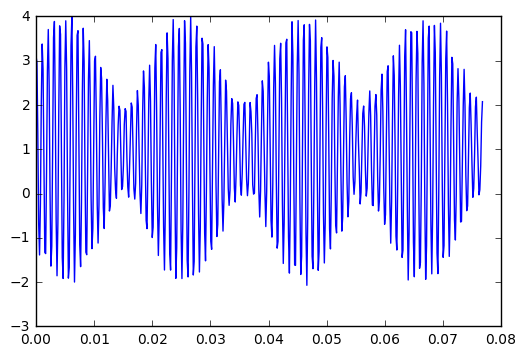

In [43]:
A_a = 2; f_a = Delta_f * 50 # Ton a, genau auf Auswertefrequenz
A_b = 1; f_b = Delta_f * 52.5  # Ton b, zwischen Auswertefrequenzen
DC = 1.
sigma = 0.1 # standard deviation of AWGN
fmin = 0.00  # untere Frequenz und
fmax = 120.0 # obere Frequenz für Spektrumsplots
t = linspace(0, T_mess*1.5, N_FFT) # Start / Stop / Anzahl
y = DC + A_a * cos(2 * pi * t * f_a) + A_b * sin(2 * pi * t * f_b) + sigma * np.random.randn(N_FFT) # y[n]
print('f_a = ', f_a, 'Hz')
print('f_b = ', f_b, 'Hz')
plt.plot(t,y);

Zur Spektralanalyse wird die DFT der Zeitfunktion berechnet. In Python (und den meisten anderen Programmiersprachen für Scientific Computing) wird die DFT über den kompletten Bereich $0 \ldots f_S$ berechnet. Bei reellwertigen Zeitsignalen sind aber die Teilspektren zwischen $0 \ldots f_S /2 $ und zwischen $f_S/2 \ldots f_S$ symmetrisch zueinander, man beschränkt sich daher in der Darstellung meist auf den Bereich $0 \ldots f_S /2 $. Damit trotzdem die Gesamtleistung auch im Frequenzbereich korrekt dargestellt wird (Parcevalsche Beziehung), wird das Spektrum (außer bei $f = 0$) mit dem Faktor 2 skaliert. 

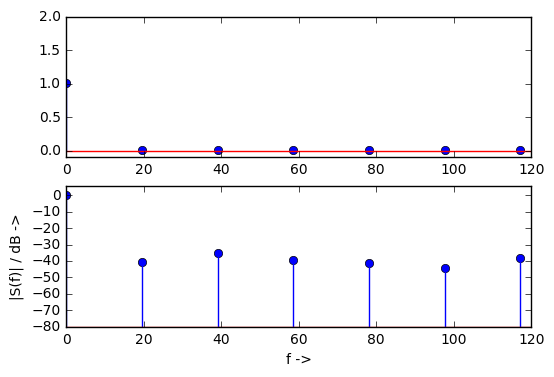

In [44]:
# calculate DFT at f = [0 ... f_S[ = [0... f_S/2[, [-f_S/2 ... 0[ :
Sy = 2 * np.abs(fft(y, N_FFT)) / N_FFT # skaliere für einseitiges Spektrum
Sy[0] = Sy[0] / 2 # korrigiere DC-Wert
f = fftfreq(N_FFT, T_S) 
# freq. points at [0... f_S/2[, [-f_S/2 ..
fig2 = plt.figure()
ax21 = fig2.add_subplot(2,1,1)
ax21.stem(f, abs(Sy)) 
ax21.set_xlim(fmin, fmax); ax21.set_ylim(-0.1, max(A_a, A_b))
ax22 = fig2.add_subplot(2,1,2); ax22.stem(f, 20*log10(abs(Sy)), bottom = -80) 
ax22.set_xlim(fmin, fmax); ax22.set_ylim(-80, max(20*log10(A_a), 20*log10(A_b)))
ax22.set_xlabel('f ->'); ax22.set_ylabel('|S(f)| / dB ->');

Wir berechnen die DFT aus $N_{FFT}$ Datenpunkten und erhalten $N_{FFT}$ Frequenzpunkte. **Wenn** wir uns ein zeitdiskretes, unendlich ausgedehntes Signal $y[n]$ vorstellen, bei dem sich diese $N_{FFT}$ Datenpunkte periodisch wiederholen, liefert die **DTFT** exakt das gleiche Ergebnis wie die DFT. Das entspricht der Multiplikation des Zeitsignals $y(t)$ mit einem Rechteckfenster der Länge $T_{mess}$ oder der Au

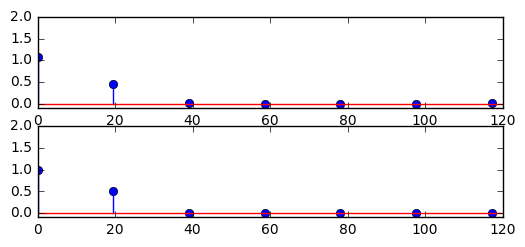

In [45]:
fig3 = plt.figure(3)
ax31 = fig3.add_subplot(3,1,2)
w = sig.windows.hamming(len(t))
X = fft(y * w, N_FFT) / N_FFT
ax31.stem(f, 2 * abs(X))
ax31.set_xlim(fmin, fmax); ax31.set_ylim(-0.1, max(A_a, A_b))
w = sig.windows.hann(len(t))
X = fft(y*w,N_FFT)/N_FFT
ax33 = fig3.add_subplot(3,1,3)
ax33.stem(f, 2 * abs(X))
ax33.set_xlim(fmin, fmax); ax33.set_ylim(-0.1, max(A_a, A_b));
